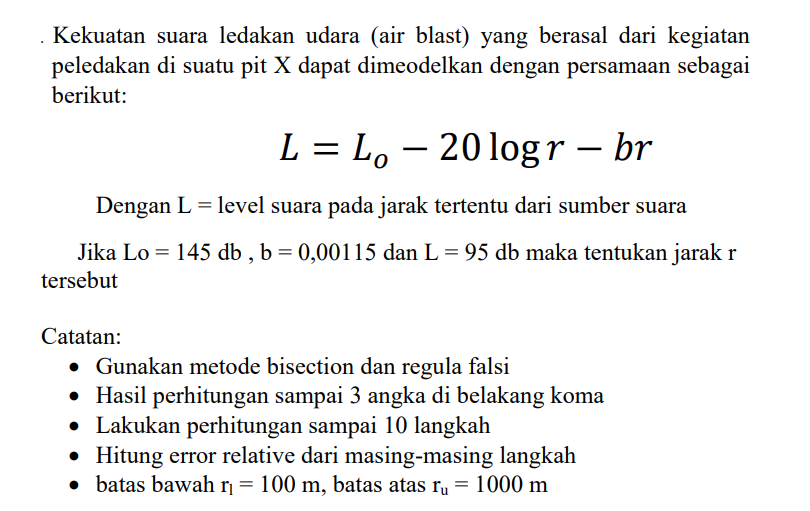

In [18]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def function(l0, b, r):
  return l0 - 20 * np.log10(r) - b * r

In [25]:
# BISECTION
xl, xu = 100, 1000
iteration = 10
target = 95 # target

l0 = 145
b = 0.00115

data = {
    # 'iteration' : list(),
    'xl'        : list(),
    'xu'        : list(),
    'xm'        : list(),
    '|%error|'   : list(),
    'lower'     : list(),
    'upper'     : list(),
    'F(xm)'     : list()
}

data_bisection = data

def insert_data(xl, xu, xm, ea, lower, upper, fxm):
  # data['iteration'].append(i)
  data['xl'].append(xl)
  data['xu'].append(xu)
  data['xm'].append(xm)
  data['|%error|'].append(ea)
  data['lower'].append(lower)
  data['upper'].append(upper)
  data['F(xm)'].append(fxm)

# print("i | xl | xu | xm | Ea% | f(xm)")
for i in range(iteration):
  if i == 0:
    lower = function(l0, b, xl)
    upper = function(l0, b, xu)
    xm = (xl + xu) / 2
    xm_old = xm
    fxm = function(l0, b, xm)
    # print(i + 1, xl, xu, xm, "-", end=" ")
    # print(fxm)
    ea = "-"
    insert_data(xl, xu, xm, ea, lower, upper, fxm)
  elif i > 0:
    if abs(upper - target) > abs(fxm - target):
      xu = xm
    elif abs(lower - target) > abs(fxm - target):
      xl = xm
    else:
      break
    lower = function(l0, b, xl)
    upper = function(l0, b, xu)
    xm_old = xm
    xm = (xl + xu) / 2
    # print(xm, xm_old)
    ea = (xm - xm_old) / xm * 100
    fxm = function(l0, b, xm)
    # print(i + 1, xl, xu, xm, abs(ea), fxm)
    insert_data(xl, xu, xm, abs(ea), lower, upper, fxm)

df_bisection = pd.DataFrame(data_bisection)
display(df_bisection)

,xl,xu,xm,|%error|,lower,upper,F(xm)
0,100.000000,1000.000,550.000000,-,104.885000,83.850000,89.560246
1,100.000000,550.000,325.000000,69.230769,104.885000,89.560246,94.388583
2,100.000000,325.000,212.500000,52.941176,104.885000,94.388583,98.208446
3,212.500000,325.000,268.750000,20.930233,98.208446,94.388583,96.103968
4,268.750000,325.000,296.875000,9.473684,96.103968,94.388583,95.207121
5,268.750000,296.875,282.812500,4.972376,96.103968,95.207121,95.644794
6,282.812500,296.875,289.843750,2.425876,95.644794,95.207121,95.423401
7,289.843750,296.875,293.359375,1.198402,95.423401,95.207121,95.314637
8,293.359375,296.875,295.117188,0.595632,95.314637,95.207121,95.260725
9,295.117188,296.875,295.996094,0.296932,95.260725,95.207121,95.233885


In [26]:
# Regula Falsi
xl, xu = 100, 1000
iteration = 10
target = 95 # target

l0 = 145
b = 0.00115

data = {
    # 'iteration' : list(),
    'xl'        : list(),
    'xu'        : list(),
    'xm'        : list(),
    '|%error|'   : list(),
    'lower'     : list(),
    'upper'     : list(),
    'F(xm)'     : list()
}

data_regulafalsi = data

def insert_data(xl, xu, xm, ea, lower, upper, fxm):
  # data['iteration'].append(i)
  data['xl'].append(xl)
  data['xu'].append(xu)
  data['xm'].append(xm)
  data['|%error|'].append(ea)
  data['lower'].append(lower)
  data['upper'].append(upper)
  data['F(xm)'].append(fxm)

# print("i | xl | xu | xm | Ea% | f(xm)")
for i in range(iteration):
  if i == 0:
    lower = function(l0, b, xl)
    upper = function(l0, b, xu)
    if target == 0:
      xm = (xu * lower - xl * upper) / (lower - upper)
    else:
      xm = (xl * upper + xu * lower) / (upper + lower)
    xm_old = xm
    fxm = function(l0, b, xm)
    # print(i + 1, xl, xu, xm, "-", end=" ")
    # print(fxm)
    ea = "-"
    insert_data(xl, xu, xm, ea, lower, upper, fxm)
  elif i > 0:
    if abs(upper - target) > abs(fxm - target):
      xu = xm
    elif abs(lower - target) > abs(fxm - target):
      xl = xm
    else:
      break
    lower = function(l0, b, xl)
    upper = function(l0, b, xu)
    xm_old = xm
    if target == 0:
      xm = (xu * lower - xl * upper) / (lower - upper)
    else:
      xm = (xl * upper + xu * lower) / (upper + lower)
    # print(xm, xm_old)
    ea = (xm - xm_old) / xm * 100
    fxm = function(l0, b, xm)
    # print(i + 1, xl, xu, xm, abs(ea), fxm)
    insert_data(xl, xu, xm, abs(ea), lower, upper, fxm)

df_regulafalsi = pd.DataFrame(data_regulafalsi)
display(df_regulafalsi)

,xl,xu,xm,|%error|,lower,upper,F(xm)
0,100.000000,1000.000000,600.153655,-,104.885000,83.850000,88.744574
1,100.000000,600.153655,370.922540,61.800266,104.885000,88.744574,93.187775
2,100.000000,370.922540,243.460961,52.354011,104.885000,93.187775,96.991433
3,243.460961,370.922540,308.466391,21.073748,96.991433,93.187775,94.861107
4,243.460961,308.466391,276.324586,11.631902,96.991433,94.861107,95.853836
5,276.324586,308.466391,292.479142,5.523319,95.853836,94.861107,95.341751
6,292.479142,308.466391,300.492967,2.666892,95.341751,94.861107,95.097747
7,292.479142,300.492967,296.491189,1.349712,95.341751,95.097747,95.218799
8,296.491189,300.492967,298.493350,0.670756,95.218799,95.097747,95.158039
9,298.493350,300.492967,299.493475,0.333939,95.158039,95.097747,95.127835


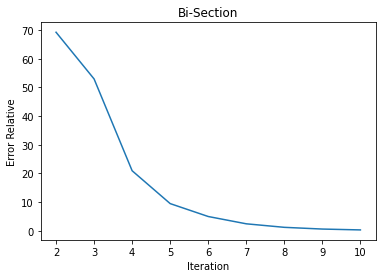

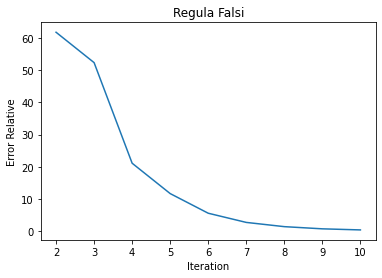

In [27]:
# Plot
plt.plot(np.arange(2, 11), np.array(data_bisection["|%error|"][1:]))
# plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|error|"][1:]))
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.title("Bi-Section")
plt.show()

# plt.plot(np.arange(2, 11), np.array(data_bisection["|error|"][1:]))
plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|%error|"][1:]))
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.title("Regula Falsi")
plt.show()

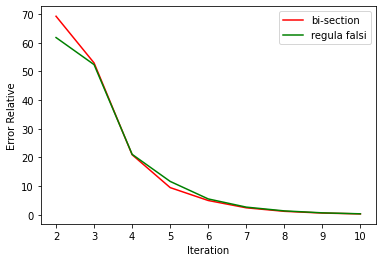

In [28]:
# Plot
plt.plot(np.arange(2, 11), np.array(data_bisection["|%error|"][1:]), color="r", label="bi-section")
plt.plot(np.arange(2, 11), np.array(data_regulafalsi["|%error|"][1:]), color="g", label="regula falsi")
plt.xlabel("Iteration")
plt.ylabel("Error Relative")
plt.legend()
plt.show()